# Статистический анализ данных
Изучение объектов и их взаимосвязей методами статистики. Выборки и статистическая значимость. Выявление и обработка аномалий. Проект. Проанализировать тарифы федерального оператора сотовой связи.

# Непрерывные и дискретные переменные
В курсе по предобработке данных вы познакомились с категориальными и количественными переменными.  
Напомним, что *количественная переменная* принимает числовое значение в диапазоне: её также называют численной.  
    
*Категориальная переменная* принимает значение из ограниченного набора.  
Другое название *категориальной переменной* — качественная.

**Непрерывные переменные** принимают любые численные значения. К примеру, время нахождения пользователя на сайте можно измерить с любой степенью точности: в минутах, секундах или микросекундах. Массу — с точностью до килограмма, грамма или миллиграмма. Время, масса, рост — примеры непрерывных переменных.  
А вот количество пользователей, зашедших на сайт в течение суток, может принимать только целые, а не любые значения. Переменные, принимающие строго определённые значения, называют **дискретные**. Количество стран с национальной поисковой системой или число студентов онлайн-курса — дискретные переменные.

Эта переменная не целочисленная, но по-прежнему принимает только строго определённые значения, а значит — дискретная. Другими словами, между её значениями всегда есть интервал без значений. Она прерывается, а значит уже не непрерывна.

# Гистограмма частот для непрерывной переменной

1.
Вы обновили интерфейс страницы оформления покупки на сайте и хотите понять, насколько сложно пользователям даётся этот процесс. Изучите самую простую метрику — время оформления покупки.
За первый день с новым интерфейсом вы получили достаточно измерений, чтобы построить гистограмму.
В прекоде набор данных со временем оформления покупки (в секундах). Постройте гистограмму с границами корзин в точках [15, 30, 45, 60, 75, 90]. Задайте непрозрачность, равную 0.7.

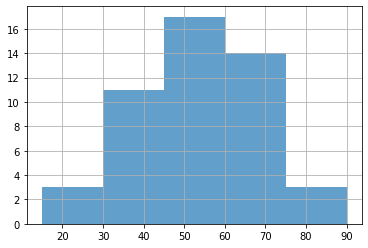

In [1]:
import pandas as pd

# датасет pur_time от англ. purchase time, «время покупки»
pur_time = pd.Series([36, 44, 73, 32, 44, 29, 63, 60, 55, 74, 61, 26, 76, 40, 39, 28, 69, 61, 54, 58, 47, 41, 70, 51, 58, 36, 71, 47, 74, 59, 50, 78, 59, 48, 67, 53, 67, 52, 38, 55, 53, 53, 43, 77, 44, 63, 63, 54])
pur_time.hist(
    bins=[15, 30, 45, 60, 75, 90], alpha=0.7
)

2.
Постройте две гистограммы времени оформления покупки со следующими границами интервалов:
[15, 35, 55, 75, 90]
[15, 45, 55, 90]
Для обеих гистограмм задайте прозрачность, равную 0.5.

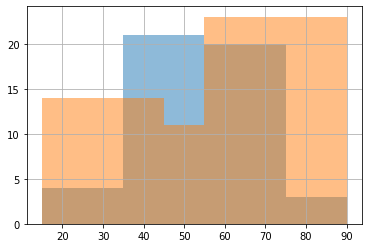

In [2]:
# назовем датасет pur_time от англ. purchase time, «время покупки»
pur_time = pd.Series([36, 44, 73, 32, 44, 29, 63, 60, 55, 74, 61, 26, 76, 40, 39, 28, 69, 61, 54, 58, 47, 41, 70, 51, 58, 36, 71, 47, 74, 59, 50, 78, 59, 48, 67, 53, 67, 52, 38, 55, 53, 53, 43, 77, 44, 63, 63, 54])
pur_time.hist(
    bins=[15, 35, 55, 75, 90], alpha=0.5
)
pur_time.hist(
    bins=[15, 45, 55, 90], alpha=0.5
)

# Гистограммы плотностей

Вы убедились, что частотная гистограмма плохо подходит непрерывным переменным: частота попадания значений в интервалы зависит от выбора границ интервалов. Нужен особый способ: учитывающий как интервалы, так и частоту попадания значений. Что если отображать частоту не высотой столбца, а его площадью?  
Площадь такого столбца находят, как площадь прямоугольника: длину интервала умножают на высоту столбца. Найденная площадь — частота непрерывной переменной, а высота столбца — плотность частоты.

Гистограмма, построенная таким образом, называется **плотностная гистограмма**. В отличие от частотной гистограммы, на её вертикальной оси откладывают плотность частоты, а не частоту. По названию осей гистограммы и различают.  
По гистограмме плотностей можно оценить, сколько значений попало в любой интервал, не обязательно выбранный для построения. Берут два значения и ищут площадь плотностной гистограммы между ними. Полученное число и будет оценкой количества значений, попавших в интервал.

# Характеристики положения

Вы хорошо знакомы с медианой и средним — характерными значениями выборки. Их также называют характеристики положения данных: по медиане и среднему можно судить, где примерно расположен набор данных на числовой оси.  
И у медианы, и у среднего есть свои преимущества. Прелесть среднего в том, что для его расчёта берут все значения датасета — это наиболее полное использование информации при поиске характеристики положения. Среднее называют алгебраическая характеристика положения.  
А вот медиана и квартили просто делят набор данных на части. Медиана — структурная характеристика положения. Можно поменять немало значений в датасете так, что медиана останется прежней. Например:  

In [3]:
data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('Среднее набора данных',data.mean())
print('Медиана набора данных',data.median()) 

Среднее набора данных 5.0
Медиана набора данных 5.0


медиана необходима, если в наборе данных встречаются выбросы: вы уже встречались с этой особенностью в курсе по исследовательскому анализу данных. Мы лишь напомним, что судить по среднему о выборке с выбросами некорректно. Как известно, когда Билл Гейтс заходит в бар, все его посетители в среднем становятся миллионерами.

1. Найдите среднее в наборе данных и посчитайте среднее расстояние до него от всех значений. Полученное значение spacing_all_mean выведите на экран.

In [4]:
data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
mean_value =  data.mean()# допишите ваш код здесь: найдите среднее значение в датасете
spacing_all =  data - mean_value
spacing_all_mean = spacing_all.mean()
print(spacing_all_mean)

0.0


# Стандартное отклонение

1.
Оцените дисперсию генеральной совокупности data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]). Результат выведите на экран.

In [6]:
import numpy as np

data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
variance = np.var(data)
print(variance)

10.0


2.
Оцените дисперсию по выборке data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]). Результат выведите на экран.

In [8]:
data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
variance_estimate = np.var(data, ddof=1)
print(variance_estimate)

11.0


3.
Оцените стандартное отклонение по выборке data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]). Сохраните результат в переменной standard_dev и выведите её на экран.

In [9]:
data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
standard_dev = np.std(data, ddof = 1)

print(standard_dev)

3.3166247903554


4.
В среднем пользователи разглядывают всплывающие сообщения на сайте 3 секунды. Дисперсия равна 0,25 секунд в квадрате. По правилу трёх сигм рассчитайте, сколько времени нужно показывать сообщение, чтобы его успело разглядеть 99% пользователей.
Результат на экран выведите так: Время показа сообщения ... .

In [11]:
adv_mean = 3
adv_var = 0.25
adv_std = np.sqrt(adv_var)

adv_time = adv_mean  + adv_std * adv_mean
print('Время показа сообщения', adv_time)

Время показа сообщения 4.5


# Скошенность наборов данных
Многие данные «из жизни» распределены нормально, или симметрично. Однако датасеты могут быть ассиметричными, то есть иметь скошенность в положительную или отрицательную сторону.  
Определить скошенность легко по гистограмме. Для этого нужно представить асимметричную гистограмму как симметричную с «дополнительными» значениями.

Такая гистограмма с дополнительными значениями справа отображает частоту значений в скошенном вправо наборе данных. Его также называют **датасетом с положительной скошенностью**, ведь дополнительные значения находятся со стороны положительного направления оси.  
Скошенный влево датасет получится, если добавить к симметричному набору данных значений слева. Если влево идёт отрицательное направление оси, такой набор данных назовут **датасетом с отрицательной скошенностью**.

Значения здесь отложены по вертикальной оси. Датасет скошен вправо (то есть в сторону положительного направления оси с учётом ориентации именно этого изображения — вверх). Такую скошенность видно и по диаграмме размаха: расстояние между первым квартилем и медианой заметно меньше, чем расстояние между медианой и третьим квартилем.  
Чтобы понять, в какую сторону скошен датасет, необязательно строить графики. Достаточно взглянуть на характеристики положения: медиану и среднее.  
Помня о том, что медиана в отличие от среднего устойчива к выбросам, легко сделать вывод, что для скошенных вправо данных медиана будет меньше среднего, а для скошенных влево — больше.  
Среднее «поедет» в ту сторону, где есть дополнительные значения. Медиана тоже будет туда двигаться, но намного медленнее.  

# Эксперименты, элементарные исходы, события

Яндекс отслеживает количество удачных постов определённого блога для Дзена. Абсолютно удачным постом считается такой, у которого число репостов сравнимо с числом лайков. Этот успех считаем за 100%.
Сгенерируйте 20, 400, 10000 случайных целых чисел из отрезка [1, 100]. Это соотношение репостов к лайкам в популяции блогеров в целом. Если для избранного блогера соотношение всегда выше, он причисляется к хорошим.
Для каждого набора чисел вычислите вероятность события «Сгенерированное число лежит в отрезке [21, 40]» (самая типичная доля репостов). Сохраните её в переменных p_20, p_400 и p_10000 соответственно.
Для вычисления вероятности напишите функцию calculate_p которая принимает в качестве параметра количество случайных чисел из отрезка [1, 100], а на выходе передаёт долю тех чисел, которые находятся в отрезке от 21 до 40 включительно.
Выведите полученные вероятности на экран на одной строке.

In [12]:
import random

random.seed(42) # метод, задающий степень случайности, не меняйте параметр 42


def calculate_p(N):
    cnt_21_40 = 0
    for i in range(N):
        random_integer = random.randint(1, 100)
        if random_integer >= 21 and random_integer <= 40:
            cnt_21_40 += 1
    return  cnt_21_40/N            


p_20 = calculate_p(20)
p_400 = calculate_p(400)
p_10000 = calculate_p(10000)

print(p_20, p_400, p_10000 )

0.2 0.215 0.1921


# Случайные величины, распределение вероятностей и интервалы значений

1.
В переменной spot_matrix хранится матрица с вероятностным пространством «сумма количества пятен двух питонов, у которых с равной вероятностью могут появиться от 5 до 10 пятен».
Составьте словарь spot_probs с распределением вероятностей для этой случайной величины. Ключами в словаре должны быть целые числа — возможные исходы эксперимента (тип int), значениями — вероятности исходов типа float. Выведите значение переменной spot_probs на экран.

In [15]:
spot_matrix = np.array(
    [
        [10, 11, 12, 13, 14, 15],
        [11, 12, 13, 14, 15, 16],
        [12, 13, 14, 15, 16, 17],
        [13, 14, 15, 16, 17, 18],
        [14, 15, 16, 17, 18, 19],
        [15, 16, 17, 18, 19, 20],
    ]
)

spot_counts = {}

for i in range(0, 6):
        for j in range(0, 6):
                if spot_matrix[i][j] not in spot_counts.keys():
                        spot_counts[spot_matrix[i][j]] = 1
                else:
                        spot_counts[spot_matrix[i][j]] += 1

spot_probs = {k:spot_counts[k]/36 for k in spot_counts}

print(*spot_probs)

10 11 12 13 14 15 16 17 18 19 20


2.
Проверьте, что сумма вероятностей всех возможных исходов равна единице. Запишите результат в переменную sum_probs_one и выведите на экран. Не удаляйте вывод spot_probs из предыдущего задания.

In [16]:
sum_probs_one = int(sum(spot_probs.values()))
print(sum_probs_one)

1


# Математическое ожидание и дисперсия

1.
В переменной x_probs в виде словаря задано распределение вероятностей случайной величины X — апрельской температуры в городе N. Найдите её математическое ожидание и дисперсию. Сохраните результаты в переменных expectation(англ. «ожидание») и variance (англ. «разброс»). Выведите их на экран.

In [18]:
x_probs = {
    '-4': 0.05,
    '-2': 0.25,
    '0': 0.1,
    '1': 0.1,
    '5': 0.1,
    '7': 0.05,
    '15': 0.35,
}
# E(X): для каждого элемента словаря вычисляем произведение вероятности и значения
# случайной величины (целочисленное представление ключа словаря):
expectation = sum([int(x_i) * x_probs[x_i] for x_i in x_probs])
# (E(X))^2
square_of_expectation = expectation ** 2
# E(X^2)
expectation_of_squares = sum(
    [int(x_i) * int(x_i) * x_probs[x_i] for x_i in x_probs]
)
variance = expectation_of_squares - square_of_expectation
print('Математическое ожидание равно', expectation)
print('Дисперсия равна', variance)

Математическое ожидание равно 5.5
Дисперсия равна 55.349999999999994


2.
Известно, что питоны разных знаков Зодиака дорастают до различного взрослого веса. Водные знаки весят 2 кг, Огненные и Земляные — 3 кг, Воздушные — 5 кг. Питоны рождаются с одинаковой частотой на протяжении всего года.
Запишите в словарь weight_probs распределение вероятностей для случайной величины «Вес питона». Найдите ее математическое ожидание и дисперсию, запишите их в переменные expectation и variance. Результат выведите на экран.

In [19]:
# Вероятность того, что отдельно взятый питон окажется одним из 12 знаков Зодиака, равна 1/12.
# Вероятность того, что он принадлежит к одной из 4 стихий, равна 1/4.
# Вероятности для двух стихий - Огня и Земли - нужно сложить, чтобы получить вероятность
# того, что питон весит 3 кг, для остальных просто остается 1/4.

# здесь код создания словаря и расчётов

weight_probs = {
        '2': 0.25,
        '3': 0.5,
        '5': 0.25
        }
# E(X): для каждого элемента словаря вычисляем произведение вероятности и значения
# случайной величины (целочисленное представление ключа словаря):
expectation = sum([int(x_i) * weight_probs[x_i] for x_i in weight_probs])
# (E(X))^2
square_of_expectation = expectation ** 2
# E(X^2)
expectation_of_squares = sum(
    [int(x_i) * int(x_i) * weight_probs[x_i] for x_i in weight_probs]
)
variance = expectation_of_squares - square_of_expectation
print('Математическое ожидание равно', expectation)
print('Дисперсия равна', variance)

Математическое ожидание равно 3.25
Дисперсия равна 1.1875


# Биномиальное распределение

1.
В некоторые дни питонов в питонопитомнике кормят грушами, а в некоторые — яблоками.
На ближайшую неделю (7 дней) есть запас на 3 дня кормления грушами и на 4 дня кормления яблоками. День может быть только грушевым или только яблочным, смешивание фруктов не разрешается.
Вариант диеты — это, например, (груши, яблоки, груши, груши, яблоки, яблоки, яблоки).
Сколько разных вариантов грушево-яблочной диеты можно составить для питонов на ближайшую неделю? Запишите результат в переменную n_diets и выведите на экран.

In [21]:
from math import factorial

# Число способов выбрать k дней из n дней:
# C(n, k) =  n! / ( k! * (n-k)! )
n = 7
k = 3

n_diets =  factorial(n)/(factorial(k) * factorial(n-k))
print(n_diets)

35.0


2.
Питон Петя решил после питонопитомника поступить в питоноакадемию. Для этого ему надо сдать шесть разных (не зависящих друг от друга) экзаменов. Петя думает, что он отлично подготовился: вероятность завалить каждый из этих экзаменов, судя по пробным вариантам, для него равна 15%.
Постройте распределение вероятностей для случайной величины «количество заваленных Петей экзаменов» и гистограмму для нее.

<BarContainer object of 7 artists>

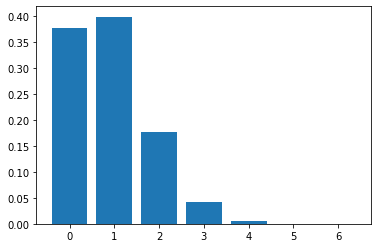

In [22]:
from matplotlib import pyplot as plt
from math import factorial

n_exams = 6
failure_rate = 0.15

distr = []

for k in range(0, n_exams + 1):
    choose = factorial(n_exams) / (factorial(k) * factorial(n_exams - k))
    prob = choose * failure_rate ** k * (1 - failure_rate) ** (n_exams - k)
    distr.append(prob)
    
# построение гистограммы распределения вероятностей
plt.bar(range(0,n_exams+1), distr)

3.
Ваша компания устраивает важное мероприятие. Пиарщики ищут хотя бы шесть инфопартнёров, чтобы обеспечить освещение этого события. По опыту, соглашается примерно одно из пяти медиа, с которыми начинаются переговоры. Постройте распределения вероятностей и гистограммы для случайной величины «количество инфопартнёров», если вы начали переговоры с 30 медиа.

<BarContainer object of 31 artists>

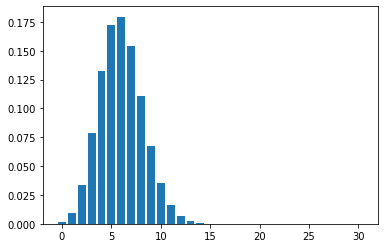

In [23]:
p =  1/5 
n = 30

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

4.
Постройте распределения вероятностей и гистограммы для случайной величины «количество инфопартнёров», если вы начали переговоры с 45 медиа.

<BarContainer object of 46 artists>

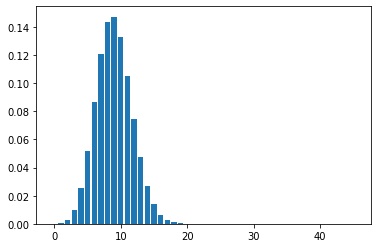

In [24]:
p =  1/5 
n = 45

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr) 

5.
Постройте распределения вероятностей и гистограммы для случайной величины «количество инфопартнёров», если вы начали переговоры с 60 медиа

<BarContainer object of 61 artists>

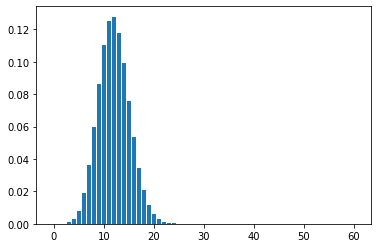

In [25]:
p =  1/5 
n =60

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr) 

# Нормальное распределение

1.
Количество посетителей сайта интернет-издания «Кукуруза» за месяц распределено нормально со средним, равным 100500 человек, и стандартным отклонением 3500 человек.
В медиаките издания указана посещаемость — 100500 уникальных посетителей в месяц. Рекламодатель, заказавший нативную рекламу, настоял на штрафе, если материал посмотрит меньше 92000 посетителей. Его желание понятно: никто не хочет переплачивать, если охват будет не такой большой, как хотелось. В ответ менеджер сайта предложил включить в договор бонус, если материал посмотрит более 111000 человек.
Предположим, что дополнительных действий по привлечению трафика запланировано не было. Найдите вероятность того, что сайт интернет-издания за следующий месяц посетит: а) более 111000 человек (что будет выплачен бонус); б) менее 92000 человек (что будет вычтен штраф).

In [26]:
from scipy import stats as st
# вставьте ваш код здесь: чему равно среднее значение распределения
mu = 100500
# вставьте ваш код здесь: чему равно стандартное отклонение распределения
sigma = 3500
distr = st.norm(mu, sigma)
# вставьте ваш код здесь: где проходит граница для бонуса
bonus_threshold = 111000
# вставьте ваш код здесь: где проходит граница для штрафа
penalty_threshold = 92000
 
# вставьте ваш код здесь: посчитайте вероятность получить бонус
p_bonus = 1 - distr.cdf(bonus_threshold)
# вставьте ваш код здесь: посчитайте вероятность получить штраф
p_penalty = distr.cdf(penalty_threshold)
 
print('Вероятность бонуса:', p_bonus)
print('Вероятность штрафа:', p_penalty)

Вероятность бонуса: 0.0013498980316301035
Вероятность штрафа: 0.0075792194387197245


2.
Интернет-магазин «Супервип» продаёт сувенирную продукцию для очень узкой аудитории корпоративных клиентов. Продажи премиальных шахмат из бивня мамонта за неделю в штуках распределены нормально со средним значением 420 и стандартным отклонением 65.
Как обычно, в пятницу вечером менеджер Снежанна торопилась к друзьям и спешно оформляла предзаказ на следующую неделю — конечно же, шахмат! Как вдруг в офис влетел менеджер Геннадий: «Что я узнал! Через неделю выйдут бомбические шашки, расписанные Софроном Никифоровым. Они будут круче тех шахмат из мамонта, ну вы поняли. Срочно их продать за следующую неделю. Все!» Снежанна резко перестала торопиться к друзьям.
Сколько Снежанна должна заказать наборов шахмат из бивня мамонта, чтобы продать их все на следующей неделе с вероятностью 90%? (Склад перед поставкой на следующую неделю будет уже пуст).

In [27]:
mu = 420# вставьте ваш код здесь: чему равно среднее значение распределения
sigma = 65 # вставьте ваш код здесь: чему равно стандартное отклонение распределения
prob =  0.9# вставьте ваш код здесь: с какой вероятностью нужно распродать весь товар?

distr = st.norm(mu, sigma)

n_shipment = distr.ppf(1 - prob)# вставьте ваш код здесь: сколько единиц товара нужно заказать со склада?

print('Нужно заказать единиц товара:', int(n_shipment))

Нужно заказать единиц товара: 336



В интернет-магазине «Вазон» пользователи делают заказы, стоимости которых распределены нормально со средним 2400 руб. и стандартным отклонением 320 руб.
Бóльшая часть покупателей выбирает доставку курьером, на которую нужно установить фиксированную цену независимо от суммы заказа.
Если верить исследованию, пользователи расстраиваются, когда стоимость доставки больше или равна половине стоимости заказа. Сколько должна стоить курьерская доставка, чтобы для 3/4 заказов она не превышала половины цены?

In [28]:
mu = 2400
sigma = 320
threshold = 3/4

max_delivery_price = st.norm(mu, sigma).ppf(1-threshold)/2

print('Максимальная стоимость доставки курьером:', max_delivery_price)

Максимальная стоимость доставки курьером: 1092.0816399686269


# Нормальная аппроксимация биномиального распределения

Компания делает ежемесячную рассылку по базе клиентов — в ней новости и предложения от партнёров. Известно, что рассылку открывают 40% получателей.
Один партнёр спланировал рекламную кампанию и рассчитывает на охват в 9 тысяч пользователей. Посчитайте, с какой вероятностью ожидания клиента будут оправданы, если сделать рассылку на 23 тысячи человек. Выведите значение p_threshold на экран.

In [30]:
import math as mt

binom_n = 23000 # ваш код здесь - целевое количество человек в рассылке
binom_p =  0.4# ваш код здесь - сколько пользователей открывают рассылку?

threshold = 9000 # ваш код здесь - на какой охват сейчас рассчитывают?

mu = binom_n * binom_p
sigma = mt.sqrt(binom_n * binom_p * (1 - binom_p))

p_threshold = 1 - st.norm(mu, sigma).cdf(threshold)
print(p_threshold)

0.9964477890716447


# Формулирование двусторонних гипотез

У вас сеть станций проката «Самокат подвезёт»: 20 точек в центре города, на каждой — максимум 50 электросамокатов. Вы хотите проверить гипотезу, что в прошлом месяце на любой станции днём было доступно в среднем 30 самокатов. Именно о таком количестве говорили урбанисты КБ «Белка» в исследовании мобильности горожан. (Если самокатов на станции меньше, то пользователи думают, что не смогут арендовать самокат, когда он понадобится. А когда их больше, горожанам кажется, что оставить самокат на парковке по завершении маршрута не получится — не будет свободных мест.)
Каждая станция ежечасно отсылала на сервер текущее количество самокатов. Вы загрузили значения с 13:00 до 16:00 за последние 30 дней. Проверьте гипотезу по этой выборке.

In [32]:

scooters = pd.Series([15, 31, 10, 21, 21, 32, 30, 25, 21,
28, 25, 32, 38, 18, 33, 24, 26, 40, 24, 37, 20, 36, 28, 38,
24, 35, 33, 21, 29, 26, 13, 25, 34, 38, 23, 37, 31, 28, 32,
24, 25, 13, 38, 34, 48, 19, 20, 22, 38, 28, 31, 18, 21, 24,
31, 21, 28, 29, 33, 40, 26, 33, 33,  6, 27, 24, 17, 28,  7,
33, 25, 25, 29, 19, 30, 29, 22, 15, 28, 36, 25, 36, 25, 29,
33, 19, 32, 32, 28, 26, 18, 48, 15, 27, 27, 27,  0, 28, 39,
27, 25, 39, 28, 22, 33, 30, 35, 19, 20, 18, 31, 44, 20, 18,
17, 28, 17, 44, 40, 33,])

optimal_value = 30

alpha = 0.05

results = st.ttest_1samp(scooters, optimal_value)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.00033528259973700724
Отвергаем нулевую гипотезу


#Формулирование односторонних гипотез
Какие типичные гипотезы были в прошлом уроке? Напомним:
- среднее генеральной совокупности равно конкретному значению;
- средние двух генеральных совокупностей равны между собой;
- среднее генеральной совокупности больше (или меньше) конкретного значения;
- среднее одной генеральной совокупности больше (или меньше), чем среднее другой генеральной совокупности.

*1 июня 2019 года вы посетили курс известного коуча и предпринимателя Роби Тоббинсона. Если вы внедрите его авторскую практику осознанного подхода к бизнесу, то ваш интернет-проект начнёт приносить не менее 50000 руб. в день. Или даже больше. Буквально через месяц. Он обещал.
Ещё до курса у вас была неплохая прибыль. Возможно, коуч и не обманул.
Проверьте по приведённому датасету дневной прибыли за последний месяц гипотезу, что размер средней дневной выручки будет равен или превысит 50000 руб.
Напомним: включающая знак равенства гипотеза обычно нулевая. Поэтому «всё сложится, как коуч прописал» — это ваша нулевая гипотеза, а «выручка меньше заявленного» —альтернативная. Случайные отклонения возможны всегда. «Методика Тоббинсона не сработала!» — так можно утверждать, только если выручка будет значимо меньше заявленной суммы.*

In [33]:
revenue = pd.Series([45407, 42345, 42842, 41805, 41315, 44078, 43833, 44803, 
                     40965,40199, 41251, 44305, 43810, 42538, 44724, 40913, 
                     44734, 43418, 42780, 42971, 41797,40433, 45054, 42568, 
                     42114, 40035, 43977, 44807, 40995, 45335, 42726, 41595])

interested_value = 50000 

alpha = 0.05

results = st.ttest_1samp(revenue, interested_value)

print('p-значение:', results.pvalue/2)

if ( results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7064149395302838e-22
Отвергаем нулевую гипотезу


# Гипотеза о равенстве средних двух генеральных совокупностей

1.
Приведены два датасета: среднее время пребывания на сайте 1) пользователей, которые авторизуются с логином и паролем, и 2) тех, кто авторизуется через социальные сети. Проверьте гипотезу о равенстве времени, которое проводят на сайте обе группы пользователей.
Критический уровень статистической значимости задайте значением 0.05.

In [34]:
# время на сайте пользователей, зашедших с логином и паролем
time_on_site_logpass = [368, 113, 328, 447, 1, 156, 335, 233, 
                       308, 181, 271, 239, 411, 293, 303, 
                       206, 196, 203, 311, 205, 297, 529, 
                       373, 217, 416, 206, 1, 128, 16, 214]

# время на сайте пользователей, зашедших через социальные сети
time_on_site_social  = [451, 182, 469, 546, 396, 630, 206, 
                        130, 45, 569, 434, 321, 374, 149, 
                        721, 350, 347, 446, 406, 365, 203, 
                        405, 631, 545, 584, 248, 171, 309, 
                        338, 505]


# ваш код ниже

alpha = 0.05

results =  st.ttest_ind(time_on_site_logpass, time_on_site_social)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0010501061456827461
Отвергаем нулевую гипотезу


2.
Приведены два датасета: глубина просмотра сайта разными группами пользователей за летние и за осенние месяцы. Проверьте гипотезу о равенстве глубины просмотра веб-ресурса. Возможно, летом посетители погружаются в контент не так глубоко — стоит учесть при планировании рекламных кампаний в это время года.
Критический уровень статистической значимости задайте значением 0.05.

In [35]:
pages_per_session_autumn = [7.1, 7.3, 9.8, 7.3, 6.4, 10.5, 8.7, 
                            17.5, 3.3, 15.5, 16.2, 0.4, 8.3, 
                            8.1, 3.0, 6.1, 4.4, 18.8, 14.7, 16.4, 
                            13.6, 4.4, 7.4, 12.4, 3.9, 13.6, 
                            8.8, 8.1, 13.6, 12.2]
pages_per_session_summer = [12.1, 24.3, 6.4, 19.9, 19.7, 12.5, 17.6, 
                            5.0, 22.4, 13.5, 10.8, 23.4, 9.4, 3.7, 
                            2.5, 19.8, 4.8, 29.0, 1.7, 28.6, 16.7, 
                            14.2, 10.6, 18.2, 14.7, 23.8, 15.9, 16.2, 
                            12.1, 14.5]

alpha = 0.05

results = st.ttest_ind(pages_per_session_autumn, pages_per_session_summer)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.002042828065164986
Отвергаем нулевую гипотезу


# Гипотеза о равенстве средних для зависимых (парных) выборок

1.
Приведены два датасета: время использования одними и теми же пользователями личного кабинета сайта до редизайна и после. Проверьте гипотезу, что после редизайна время использования личного кабинета на сайте изменилось (увеличилось или уменьшилось).

In [36]:
time_before = [1732, 1301, 1540, 2247, 1632, 1550, 754, 1946, 1889, 
          2748, 1349, 1648, 1665, 2416, 1470, 1681, 1868, 1629, 
          1271, 1633, 2131, 942, 1599, 1127, 2200, 661, 1207, 
          1737, 2410, 1486]

time_after = [955, 2577, 360, 139, 1618, 990, 644, 1796, 1487, 949, 472, 
         1906, 1758, 1258, 2554, 612, 309, 1864, 1294, 1487, 1164, 1559, 
         491, 2286, 1270, 2069, 1553, 1629, 1704, 1623]

alpha = 0.05

results = st.ttest_rel(time_before, time_after)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0751397944405015
Не получилось отвергнуть нулевую гипотезу


2.
Приведены два датасета: количество патронов, покупаемых постоянными игроками в онлайн-игре, — до и после внедрения игровой логики, стимулирующей к стрельбе очередями. Проверьте гипотезу, что после нововведений игроки стали тратить больше патронов.

In [37]:
bullets_before = [821, 1164, 598, 854, 455, 1220, 161, 1400, 479, 215, 
          564, 159, 920, 173, 276, 444, 273, 711, 291, 880, 
          892, 712, 16, 476, 498, 9, 1251, 938, 389, 513]

bullets_after = [904, 220, 676, 459, 299, 659, 1698, 1120, 514, 1086, 1499, 
         1262, 829, 476, 1149, 996, 1247, 1117, 1324, 532, 1458, 898, 
         1837, 455, 1667, 898, 474, 558, 639, 1012]

print('cреднее до: ', pd.Series(bullets_before).mean())
print('cреднее после: ', pd.Series(bullets_after).mean())

alpha = 0.05

results =  st.ttest_rel(bullets_before, bullets_after)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее до:  591.7333333333333
cреднее после:  932.0666666666667
p-значение: 0.010789503820811123
Отвергаем нулевую гипотезу
